In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable
from floquet_simulations.plot_functions import PlotParams
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.hamiltonians import ConvertComplex
# import seaborn as sns
from scipy.special import jn_zeros
import sys
from mpl_toolkits import mplot3d
PlotParams(fontsize=10)

def unique(a):
    unique, counts = np.unique(a, return_counts=True)
    return np.asarray((unique, counts)).T


def FloatToStringSave(a):
    return str(a).replace(".", "p")

In [2]:
df_dir = Path().absolute().parent.parent/"paper_data"/f"Heff_omega=8,alpha=1,beta=1,phi3=0,2.csv"
dfO = pd.read_csv(df_dir, index_col=False, 
                        converters={"FT-J12": ConvertComplex,
                                  "FT-J23": ConvertComplex,
                                  "FT-J31": ConvertComplex,
                                  # "HE-J12": ConvertComplex,
                                  # "HE-J23": ConvertComplex,
                                  # "HE-J31": ConvertComplex,
                                  # "HE-O1": ConvertComplex,
                                  # "HE-O2": ConvertComplex,
                                  # "HE-O3": ConvertComplex
                                    })


dfO["FT-J12oJ23"] = np.abs(dfO["FT-J12"] / dfO["FT-J23"])
dfO["FT-J31oJ23"] = np.abs(dfO["FT-J31"] / dfO["FT-J23"])

dfO = dfO.sort_values(by=['A3', 'A2'], ignore_index=True)

A2_min = 0
A2_max = jn_zeros(0,1)[0]*8
A2_range = len(np.append(np.linspace(0,19.2,193), [1]))
A3_min = 0
A3_max = jn_zeros(0,1)[0]*8
A3_range = len(np.append(np.linspace(0,19.2,193), [1]))
# domains
dfP = dfO[
           (dfO.A3 <=A3_max)
           &(dfO.A3 >= A3_min)
           &(dfO.A2 <=A2_max)
           &(dfO.A2 >=A2_min)
          ]
# dfP = dfO
n_section_x = A3_range#401#16; 
n_section_y = A2_range#301#186


A2_square = np.resize(np.array(dfP.A2.to_list()), (n_section_x, n_section_y))
A3_square = np.resize(np.array(dfP.A3.to_list()), (n_section_x, n_section_y))
X = np.resize(np.array(dfP["FT-J12oJ23"].to_list()), (n_section_x, n_section_y))
# X = np.resize(np.array(dfP["FT-LowerT.X"].to_list()), (n_section_x, n_section_y))
Y = np.resize(np.array(dfP["FT-J31oJ23"].to_list()), (n_section_x, n_section_y))
# Y = np.resize(np.array(dfP["FT-LowerT.Y"].to_list()), (n_section_x, n_section_y))


/tmp/ipykernel_2992/2631836400.py:82: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.draw()


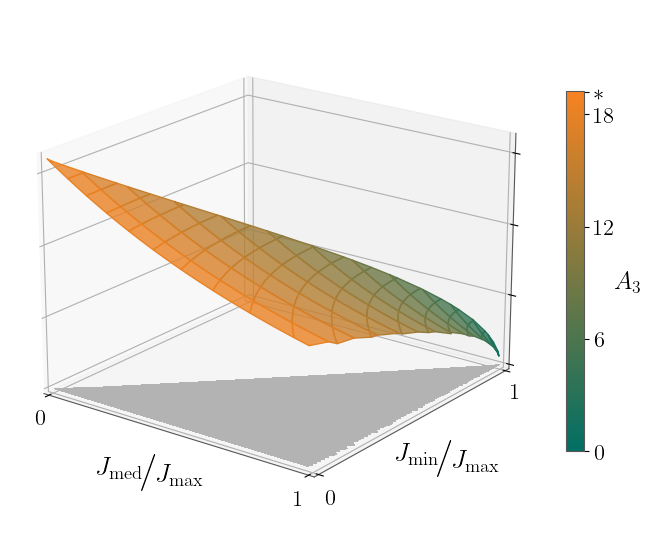

In [3]:

# create colormap according to x-value (can use any 50x50 array)
color_dimension = A3_square # change to desired fourth dimension
z_dimension = A2_square
fontsize=18
PlotParams(fontsize=fontsize)
minn, maxx = color_dimension.min(), color_dimension.max()
norm = mpl.colors.Normalize(minn, maxx)
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', '#F78320'], N=256)
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])
fcolors = m.to_rgba(color_dimension)

#remove parts outside the triangl
# X = np.where(Y>1.2, np.nan, X)
# Y =np.where(Y>1.2, np.nan, Y)
X = np.where(X<1, X, np.nan)
Y =np.where(X<1, Y, np.nan)
z_dimension = np.where(X<1, z_dimension, np.nan)
# X = np.where(X<0, np.nan, X)
# Y = np.where(Y>1, np.nan, Y)
# Y = np.where(Y<0, np.nan, Y)

X = np.where(X>Y, X, np.nan)
Y = np.where(X>Y, Y, np.nan)

figsize=(18,18)
cm_unit = 1/2.54
# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit), tight_layout=True)
# ax.view_init(20,267)
ax.view_init(20,307)
# ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,z_dimension, 
                facecolors=fcolors,
                vmin=minn, vmax=maxx,
                rstride=14, cstride=10,  alpha=0.8, 
                shade=False,
                        linewidth=1,
                        antialiased=True
                        )

cset = ax.contourf(X, Y, z_dimension, zdir='z', offset=0,colors="0.7")


ax.zaxis.set_rotate_label(False) 
ax.yaxis.set_rotate_label(False) 
ax.xaxis.set_rotate_label(False) 

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$', labelpad = 0.00000001, rotation=0, fontsize=1.5)
ax.set_ylabel(r'$\nicefrac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 2, rotation = 0, fontsize=1.5)
ax.set_zlabel('', labelpad = 2, rotation=0)
ax.tick_params(axis="x", pad = 0.001)
ax.tick_params(axis="y", pad = 0.001)

ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])
ax.set_zticks([0,6,12,18
        #       , np.round(jn_zeros(0,3)[0]*8)
               ], labels=["", "", "", ""])

ax.set_xlim((0,1))
ax.set_ylim((0,1))

# ax.xaxis.set_minor_locator([14.8])
# ax.axes().zaxis.set_minor_locator([14.8])

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$', labelpad = 0.0001, rotation=0, fontsize=fontsize*1.5)
ax.set_ylabel(r'$\nicefrac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 2, rotation = 0, fontsize=fontsize*1.5)

# divider = make_axes_locatable(ax)
# cax = divider.new_vertical(size='5%', pad=0.6)
# cax = divider.append_axes('right', size=f"5%", pad=0.01)
#     fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)# label="unweighted graph distance")
# fig.add_axes(cax)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax = ax, shrink =0.55, pad=0.05, ticks=[0, 6, 12, 18, 19.2])
cbar.ax.set_yticklabels([r"$0$", r"$6$", r"$12$", r"$18$", r"$\ast$"])

# cax = divider.append_axes('right', size=f"10%", pad=0.05)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
# cbar = plt.colorbar(m)
cbar.ax.set_ylabel(r"$A_3$", rotation=0, labelpad=8)
fig.canvas.draw() 
plt.tight_layout()
# fig.savefig(Path().absolute().parent.parent/"figures"/"paper"/"3d_tunnelling_cover_alpha=beta_noyaxis.pdf", format="pdf", bbox_inches="tight")
plt.show()





/tmp/ipykernel_28808/1115061319.py:82: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.draw()


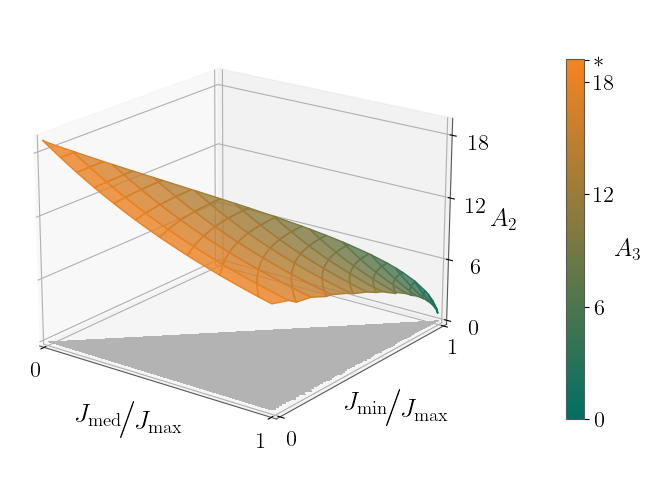

In [10]:

# create colormap according to x-value (can use any 50x50 array)
color_dimension = A3_square # change to desired fourth dimension
z_dimension = A2_square
fontsize=18
PlotParams(fontsize=fontsize)
minn, maxx = color_dimension.min(), color_dimension.max()
norm = mpl.colors.Normalize(minn, maxx)
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', '#F78320'], N=256)
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])
fcolors = m.to_rgba(color_dimension)

#remove parts outside the triangl
# X = np.where(Y>1.2, np.nan, X)
# Y =np.where(Y>1.2, np.nan, Y)
X = np.where(X<1, X, np.nan)
Y =np.where(X<1, Y, np.nan)
z_dimension = np.where(X<1, z_dimension, np.nan)
# X = np.where(X<0, np.nan, X)
# Y = np.where(Y>1, np.nan, Y)
# Y = np.where(Y<0, np.nan, Y)

X = np.where(X>Y, X, np.nan)
Y = np.where(X>Y, Y, np.nan)

figsize=(18,18)
cm_unit = 1/2.54
# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit), tight_layout=True)
# ax.view_init(20,267)
ax.view_init(20,307)
# ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,z_dimension, 
                facecolors=fcolors,
                vmin=minn, vmax=maxx,
                rstride=14, cstride=10,  alpha=0.8, 
                shade=False,
                        linewidth=1,
                        antialiased=True
                        )

cset = ax.contourf(X, Y, z_dimension, zdir='z', offset=0,colors="0.7")


ax.zaxis.set_rotate_label(False) 
ax.yaxis.set_rotate_label(False) 
ax.xaxis.set_rotate_label(False) 

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$', labelpad = 0.00000001, rotation=0, fontsize=1.5)
ax.set_ylabel(r'$\nicefrac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 2, rotation = 0, fontsize=1.5)
ax.set_zlabel(r'$A_2$', labelpad = 2, rotation=0)
ax.tick_params(axis="x", pad = 0.001)
ax.tick_params(axis="y", pad = 0.001)

ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])
ax.set_zticks([0,6,12,18
        #       , np.round(jn_zeros(0,3)[0]*8)
               ], labels=["0", "6", "12", "18"])

ax.set_xlim((0,1))
ax.set_ylim((0,1))

# ax.xaxis.set_minor_locator([14.8])
# ax.axes().zaxis.set_minor_locator([14.8])

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$', labelpad = 0.0001, rotation=0, fontsize=fontsize*1.5)
ax.set_ylabel(r'$\nicefrac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 2, rotation = 0, fontsize=fontsize*1.5)

# divider = make_axes_locatable(ax)
# cax = divider.new_vertical(size='5%', pad=0.6)
# cax = divider.append_axes('right', size=f"5%", pad=0.01)
#     fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)# label="unweighted graph distance")
# fig.add_axes(cax)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax = ax, shrink =0.55, pad=0.15, ticks=[0, 6, 12, 18, 19.2])
cbar.ax.set_yticklabels([r"$0$", r"$6$", r"$12$", r"$18$", r"$\ast$"])

# cax = divider.append_axes('right', size=f"10%", pad=0.05)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
# cbar = plt.colorbar(m)
cbar.ax.set_ylabel(r"$A_3$", rotation=0, labelpad=8)
fig.canvas.draw() 
plt.tight_layout()
fig.savefig(Path().absolute().parent.parent/"figures"/"cpgm_pres"/"3d_tunnelling_cover_alpha=beta_noyaxis.png", format="png", bbox_inches="tight")
plt.show()







In [ ]:

fontsize=10
PlotParams(fontsize=fontsize)

X_flat = np.array(dfP["FT-J12oJ23"].to_list())
Y_flat = np.array(dfP["FT-J31oJ23"].to_list())

# remove off diagonal parts
X_flat = np.where(X_flat>Y_flat, X_flat, np.nan)
Y_flat = np.where(X_flat>Y_flat, Y_flat, np.nan)

#remove parts outside the triangl
X_flat = np.where(X_flat<=1, X_flat, np.nan)
Y_flat =np.where(X_flat<=1, Y_flat, np.nan)

#set colour axis
colour_flat = np.array(dfP.A3.to_list())

minn, maxx = colour_flat.min(), colour_flat.max()
norm = mpl.colors.Normalize(minn, maxx)
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', '#F78320'], N=256)
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])
fcolors = m.to_rgba(color_dimension)

figsize=(7,6)
cm_unit = 1/2.54
# plot
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit), tight_layout=True)
ax.scatter(X_flat, Y_flat, c=colour_flat, s = 1, alpha=1, norm=norm, cmap=cmap)

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$', labelpad = 0.00000001, rotation=0, fontsize=1.5)
ax.set_ylabel(r'$\nicefrac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 2, rotation = 0, fontsize=1.5)
ax.tick_params(axis="x", pad = 0.001)
ax.tick_params(axis="y", pad = 0.001)

ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])

ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{mid}}}{J_{\mathrm{max}}}$', labelpad = 0.0001, rotation=0, fontsize=fontsize*1.5)
ax.set_ylabel(r'$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 14, rotation = 0, fontsize=fontsize*1.5)

colourbar_pad = 0.1; colourbar_size_percentage=7
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=f"{colourbar_size_percentage}%", pad=colourbar_pad)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks = [0, 6, 12, 18, 19.2])
cbar.ax.set_yticklabels([r"$0$", r"$6$", r"$12$", r"$18$", r"$\ast$"])
cbar.ax.set_ylabel(r"$A_3$", rotation=0, labelpad=8)
fig.savefig(Path().absolute().parent.parent/"figures"/"paper"/"2d_tunnelling_cover_alpha=beta_A3.pdf", format="pdf", bbox_inches="tight")
plt.show()